# Setting Up

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

import os
import warnings
warnings.filterwarnings("ignore")

In [70]:
path = "ecomm_sales.csv"
df = pd.read_csv(path)

In [71]:
#reading the dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [72]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
30389,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
30390,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
30391,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
30392,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"
30393,248150,AA Batteries (4-pack),1,3.84,08/16/19 08:13,"738 Park St, Los Angeles, CA 90001"


We have successfully got data from April to March (1 year) in a single dataframe.

In [73]:
df.describe(include='all').T

,count,unique,top,freq
Order ID,30307,29019,Order ID,61
Product,30307,20,Lightning Charging Cable,3556
Quantity Ordered,30307,9,1,27405
Price Each,30307,24,14.95,3556
Order Date,30307,23316,Order Date,61
Purchase Address,30307,27854,Purchase Address,61


Looks like we have some unexpected values in the Order ID, Order Date, and Purchase Address Columns, where the column title is substituted for the input. We shall clean it up.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30394 entries, 0 to 30393
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          30307 non-null  object
 1   Product           30307 non-null  object
 2   Quantity Ordered  30307 non-null  object
 3   Price Each        30307 non-null  object
 4   Order Date        30307 non-null  object
 5   Purchase Address  30307 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


# Data Cleaning

In [75]:
#checking for nan values
df.isnull().values.any(axis=1)

array([False,  True, False, ..., False, False, False])

In [76]:
#counting nan values
df.isnull().sum().sum()

522

In [77]:
#extracting rows with nan values
df_nan = df[df.isnull().values.any(axis=1)]
df_nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
28132,NaN,NaN,NaN,NaN,NaN,NaN
28879,NaN,NaN,NaN,NaN,NaN,NaN
29097,NaN,NaN,NaN,NaN,NaN,NaN
29247,NaN,NaN,NaN,NaN,NaN,NaN


We have entire rows with NaN values, which will not contribute to our analysis in any way.

In [78]:
#dropping rows with nan values
df = df.dropna(how = 'all')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30307 entries, 0 to 30393
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          30307 non-null  object
 1   Product           30307 non-null  object
 2   Quantity Ordered  30307 non-null  object
 3   Price Each        30307 non-null  object
 4   Order Date        30307 non-null  object
 5   Purchase Address  30307 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [80]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
30390,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
30391,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
30392,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [81]:
#rechcking if there are rows with nan values/
df_nan1 = df[df.isnull().values.any(axis=1)]
df_nan1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


We have successfully cleaned all rows with NaN values.

Now, let's check for duplicate values as we noticed Purchase Address, Order Date and Order ID columns have column name in multiple places instead of the original value. 

In [82]:
#checking the order ID & Order Date columns
j = 0
k = 0
l = 0

for i in range(0, len(df)):
    oid = df['Order ID'].iloc[i]
    odt = df['Order Date'].iloc[i]
    padd = df['Purchase Address'].iloc[i]
    if oid == 'Order ID':
        k = k+1
    if odt == 'Order Date':
        j = j+1
    if padd == 'Purchase Address':
        l = l+1    
print("No of instances where column name is copied in the Order ID column:", k)
print("No of instances where column name is copied in the Order Date column:", j)
print("No of instances where column name is copied in the Purchase Address column:", l)

No of instances where column name is copied in the Order ID column: 61
No of instances where column name is copied in the Order Date column: 61
No of instances where column name is copied in the Purchase Address column: 61


Seems like we have entire rows with column names as entries. Let's check it out.

In [83]:
temp_df =df[df['Order Date'] == 'Order Date']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
27988,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
28600,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
28721,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
29088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Now, let's drop these 355 rows. 

In [84]:
df = df[df['Order Date'] != 'Order Date']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
30390,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
30391,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
30392,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [85]:
#checking the order ID & Order Date columns
j = 0
k = 0
l = 0

for i in range(0, len(df)):
    oid = df['Order ID'].iloc[i]
    odt = df['Order Date'].iloc[i]
    padd = df['Purchase Address'].iloc[i]
    if oid == 'Order ID':
        k = k+1
    if odt == 'Order Date':
        j = j+1
    if padd == 'Purchase Address':
        l = l+1    
print("No of instances where column name is copied in the Order ID column:", k)
print("No of instances where column name is copied in the Order Date column:", j)
print("No of instances where column name is copied in the Purchase Address column:", l)

No of instances where column name is copied in the Order ID column: 0
No of instances where column name is copied in the Order Date column: 0
No of instances where column name is copied in the Purchase Address column: 0


So, we have successfully cleaned the 'column name as an entry' issue.

In [86]:
#checking data types of the columns
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Intuitively, Quantity Ordered and Price Each columns should be numeric (integer and float data type respectively). We need to change the data type or easier calculations and analysis.

In [87]:
#converting Quanity and Price Each columns to numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [88]:
#checking data types of the columns
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [89]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
30390,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
30391,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
30392,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [90]:
#converting order date to date time data type
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

We have converted the order date successfully to date time data type (which is the ideal data type).

The data set now looks good. Let's proceed with creation of new, important features.

# Adding New Features

In [91]:
#adding month column
df['Month'] = df['Order Date'].dt.month
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,2019-08-29 22:19:00,"868 Hickory St, San Francisco, CA 94016",8
30390,248147,AAA Batteries (4-pack),3,2.99,2019-08-31 16:26:00,"206 Lakeview St, Boston, MA 02215",8
30391,248148,AA Batteries (4-pack),1,3.84,2019-08-02 07:25:00,"568 13th St, Seattle, WA 98101",8
30392,248149,USB-C Charging Cable,1,11.95,2019-08-08 12:10:00,"495 Walnut St, San Francisco, CA 94016",8


In [92]:
#adding day of the month column
df['Day'] = df['Order Date'].dt.day
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30
...,...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,2019-08-29 22:19:00,"868 Hickory St, San Francisco, CA 94016",8,29
30390,248147,AAA Batteries (4-pack),3,2.99,2019-08-31 16:26:00,"206 Lakeview St, Boston, MA 02215",8,31
30391,248148,AA Batteries (4-pack),1,3.84,2019-08-02 07:25:00,"568 13th St, Seattle, WA 98101",8,2
30392,248149,USB-C Charging Cable,1,11.95,2019-08-08 12:10:00,"495 Walnut St, San Francisco, CA 94016",8,8


In [93]:
#adding sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,11.99
...,...,...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,2019-08-29 22:19:00,"868 Hickory St, San Francisco, CA 94016",8,29,99.99
30390,248147,AAA Batteries (4-pack),3,2.99,2019-08-31 16:26:00,"206 Lakeview St, Boston, MA 02215",8,31,8.97
30391,248148,AA Batteries (4-pack),1,3.84,2019-08-02 07:25:00,"568 13th St, Seattle, WA 98101",8,2,3.84
30392,248149,USB-C Charging Cable,1,11.95,2019-08-08 12:10:00,"495 Walnut St, San Francisco, CA 94016",8,8,11.95


In [94]:
#adding city column
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,2019-08-29 22:19:00,"868 Hickory St, San Francisco, CA 94016",8,29,99.99,San Francisco
30390,248147,AAA Batteries (4-pack),3,2.99,2019-08-31 16:26:00,"206 Lakeview St, Boston, MA 02215",8,31,8.97,Boston
30391,248148,AA Batteries (4-pack),1,3.84,2019-08-02 07:25:00,"568 13th St, Seattle, WA 98101",8,2,3.84,Seattle
30392,248149,USB-C Charging Cable,1,11.95,2019-08-08 12:10:00,"495 Walnut St, San Francisco, CA 94016",8,8,11.95,San Francisco


Two cities in different states can have the same names. So, let's grab the corresponding states too for more accurate analysis.

In [95]:
#adding state to the city column
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2])
df['State'] = df['State'].apply(lambda x: x.split(' ')[1])
df['City'] = df['City'] + " (" + (df['State'])+")"
df.drop(columns = 'State', inplace = True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,2019-08-29 22:19:00,"868 Hickory St, San Francisco, CA 94016",8,29,99.99,San Francisco (CA)
30390,248147,AAA Batteries (4-pack),3,2.99,2019-08-31 16:26:00,"206 Lakeview St, Boston, MA 02215",8,31,8.97,Boston (MA)
30391,248148,AA Batteries (4-pack),1,3.84,2019-08-02 07:25:00,"568 13th St, Seattle, WA 98101",8,2,3.84,Seattle (WA)
30392,248149,USB-C Charging Cable,1,11.95,2019-08-08 12:10:00,"495 Walnut St, San Francisco, CA 94016",8,8,11.95,San Francisco (CA)


In [96]:
#adding the order hour column
df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,2019-08-29 22:19:00,"868 Hickory St, San Francisco, CA 94016",8,29,99.99,San Francisco (CA),22
30390,248147,AAA Batteries (4-pack),3,2.99,2019-08-31 16:26:00,"206 Lakeview St, Boston, MA 02215",8,31,8.97,Boston (MA),16
30391,248148,AA Batteries (4-pack),1,3.84,2019-08-02 07:25:00,"568 13th St, Seattle, WA 98101",8,2,3.84,Seattle (WA),7
30392,248149,USB-C Charging Cable,1,11.95,2019-08-08 12:10:00,"495 Walnut St, San Francisco, CA 94016",8,8,11.95,San Francisco (CA),12


In [97]:
#adding the week day column 
df['Week Day'] = df['Order Date'].dt.day_name()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Sales,City,Hour,Week Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,23.90,Dallas (TX),8,Friday
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,99.99,Boston (MA),22,Sunday
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00,Los Angeles (CA),14,Friday
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99,Los Angeles (CA),14,Friday
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,11.99,Los Angeles (CA),9,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,2019-08-29 22:19:00,"868 Hickory St, San Francisco, CA 94016",8,29,99.99,San Francisco (CA),22,Thursday
30390,248147,AAA Batteries (4-pack),3,2.99,2019-08-31 16:26:00,"206 Lakeview St, Boston, MA 02215",8,31,8.97,Boston (MA),16,Saturday
30391,248148,AA Batteries (4-pack),1,3.84,2019-08-02 07:25:00,"568 13th St, Seattle, WA 98101",8,2,3.84,Seattle (WA),7,Friday
30392,248149,USB-C Charging Cable,1,11.95,2019-08-08 12:10:00,"495 Walnut St, San Francisco, CA 94016",8,8,11.95,San Francisco (CA),12,Thursday


In [98]:
#checking dtypes once again
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Day                          int32
Sales                      float64
City                        object
Hour                         int32
Week Day                    object
dtype: object

# Analysis Begins

Before going forward, let us understand a few business related concerns. 

*Orders is not the same thing as Sales.*

For example, 100 orders can be placed in a day but their combined sales can vary. It can be 10000 or 50000 depending upon the product ordered. 

Similarly, sales of 10000 can be achieved via a single order or multiple orders combined. This also depends upon the product ordered.

So, best product in terms of order and in terms of sales can be different.

### Best month in terms of sales

In [99]:
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')  # Ensures proper conversion


In [100]:
df['Month'] = df['Month'].dt.month


In [101]:
# Check the current data type
print(df['Month'].dtype)

# Convert to datetime if necessary
if not pd.api.types.is_datetime64_any_dtype(df['Month']):
    df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

# Extract the month
df['Month'] = df['Month'].dt.month

# Perform the groupby operation
best_month = df.groupby('Month')['Sales'].sum()  # Replace 'Sales' with your numeric column
print(best_month)


int32
Month
1    5640471.42
Name: Sales, dtype: float64


December was the best month in terms of sales. One of the reasons for this is the Christmas celebrations.

### Best month in terms of orders

In [102]:
#creating a subset dataframe and adding counter to it

order_count = df[['Order ID', 'Month']]

order_count['Counter'] = 1

order_count

,Order ID,Month,Counter
0,176558,1,1
2,176559,1,1
3,176560,1,1
4,176560,1,1
5,176561,1,1
...,...,...,...
30389,248146,1,1
30390,248147,1,1
30391,248148,1,1
30392,248149,1,1


In [103]:
max_order_month = order_count.groupby('Month').sum()
max_order_month

,Order ID,Counter
Month,,
1,1765581765591765601765601765611765621765631765...,30246


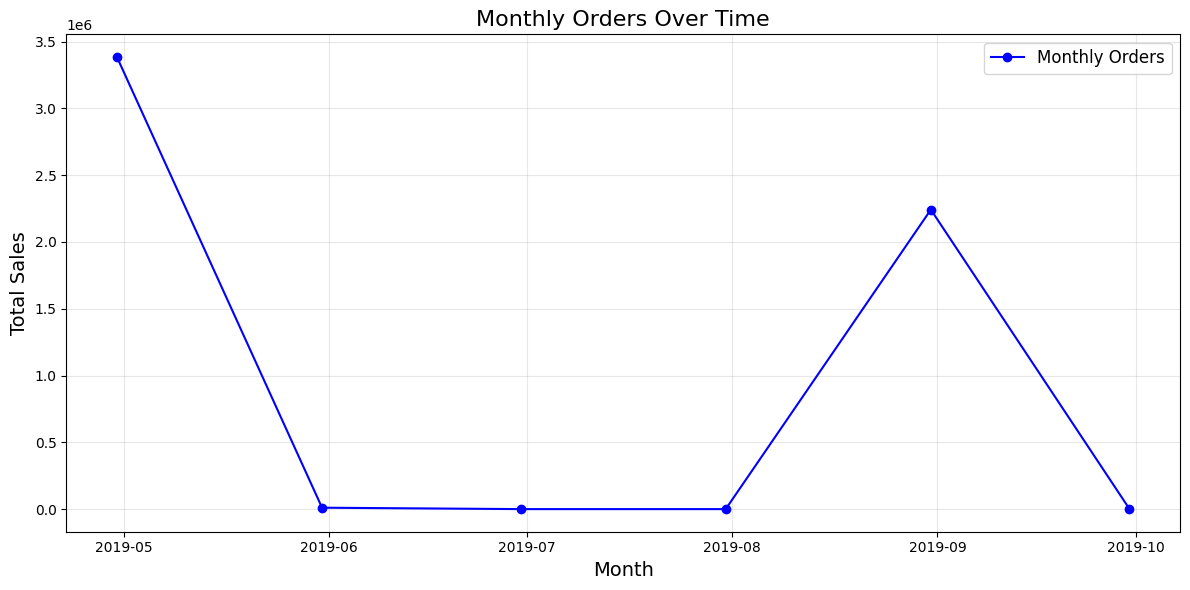

In [104]:
# Ensure 'Sales' column exists
if 'Sales' not in df.columns:
    df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Ensure 'Order Date' is the index
if df.index.name != 'Order Date':
    df = df.set_index('Order Date')

# Resample and plot monthly orders
df_monthly = df['Sales'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly, marker='o', linestyle='-', color='b', label='Monthly Orders')
plt.title('Monthly Orders Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


So, maximum orders were also placed in December. This is again due to the festive season. People buy for themselves, their families and for gifting.

### Best city in terms of sales

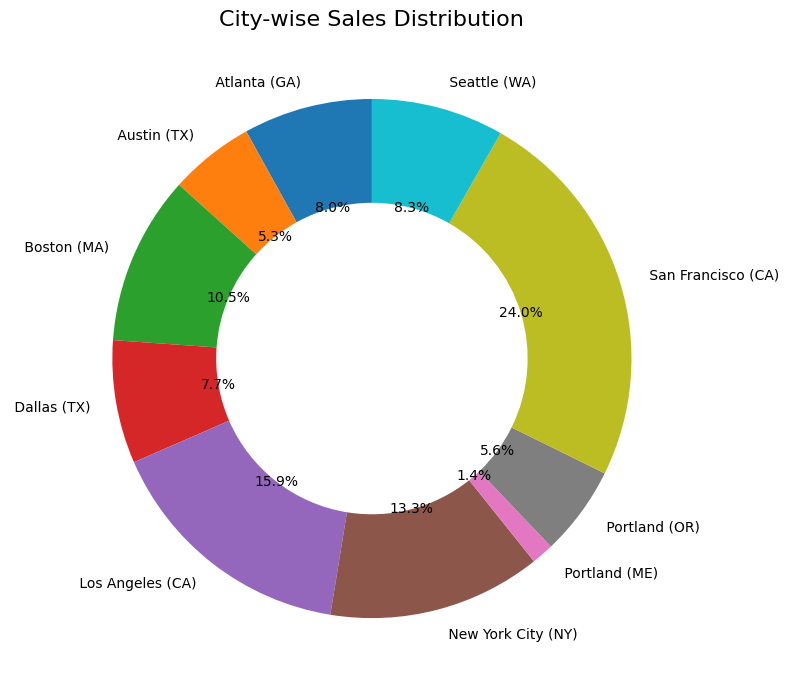

                     Quantity Ordered  Price Each  Month     Day       Sales  \
City                                                                           
 Atlanta (GA)                    2686   451323.17   2413   37799   453722.58   
 Austin (TX)                     1827   296633.65   1622   25513   298397.20   
 Boston (MA)                     3599   589675.38   3163   49243   594155.41   
 Dallas (TX)                     2621   430647.33   2318   36973   432603.93   
 Los Angeles (CA)                5471   891861.82   4893   77399   896860.73   
 New York City (NY)              4545   743526.74   4060   63690   749745.59   
 Portland (ME)                    446    77524.62    408    6482    77933.09   
 Portland (OR)                   1880   313858.38   1651   26142   315484.71   
 San Francisco (CA)              8179  1345378.84   7270  114096  1355827.90   
 Seattle (WA)                    2756   462925.79   2448   37944   465740.28   

                       Hour  
City     

In [105]:
import matplotlib.pyplot as plt

# Aggregate sales by city
city_sales = df.groupby('City')['Sales'].sum()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(city_sales, labels=city_sales.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('City-wise Sales Distribution', fontsize=16)

# Display the chart
plt.tight_layout()
plt.show()



# Ensure 'City' column exists and drop rows with NaN in 'City'
df = df.dropna(subset=['City'])

# Perform grouping and summation on numeric columns only
best_city = df.groupby('City').sum(numeric_only=True)

print(best_city)



Clearly, San Francisco has the highest sales. If you wonder at the reason, one can be the high requirements of electronics (which have high prices) in the Silicon Valley. Also, maybe people have more money in San Francisco.

In [106]:
#max_order_city = city_order_count.groupby('City').sum()
#max_order_city

Interestingly, San Fransisco has highest number of orders too. This can be credited to the lifestyle and needs of the people living there.

### Best timings for advertisements to get maximum conversions

In [107]:
print(df.columns)


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Purchase Address', 'Month', 'Day', 'Sales', 'City', 'Hour',
       'Week Day'],
      dtype='object')


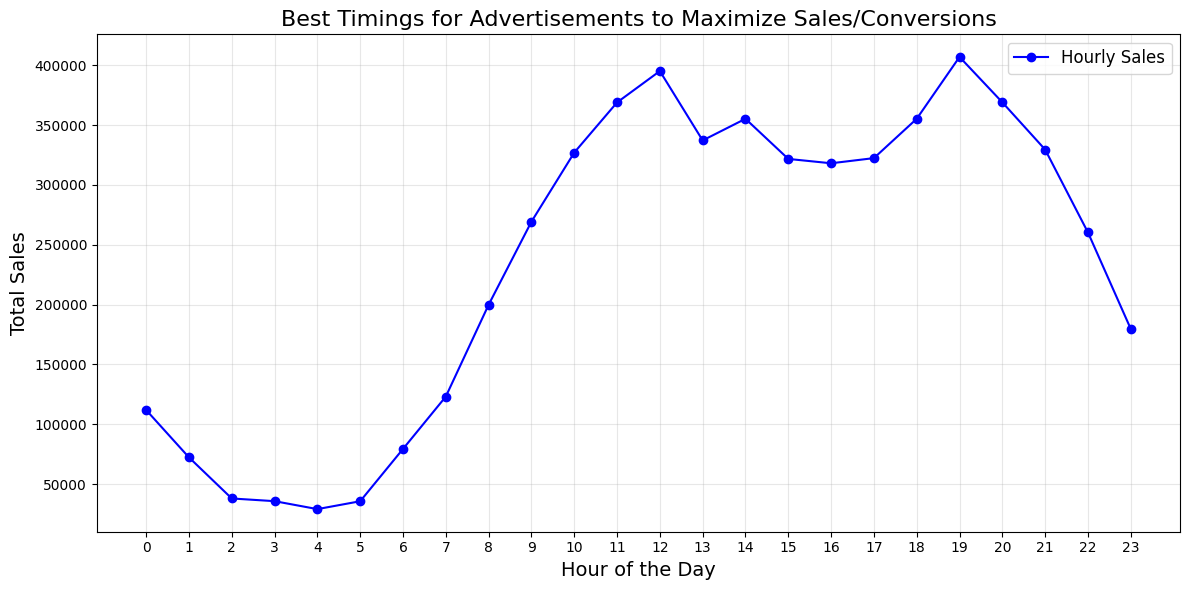

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Hour' is a numeric type
df['Hour'] = pd.to_numeric(df['Hour'], errors='coerce')

# Group by hour and sum the sales (assuming 'Sales' represents conversions or total sales value)
df_hourly_sales = df.groupby('Hour')['Sales'].sum()

# Plot the line chart for sales by hour of the day
plt.figure(figsize=(12, 6))
plt.plot(df_hourly_sales.index, df_hourly_sales, marker='o', linestyle='-', color='b', label='Hourly Sales')
plt.title('Best Timings for Advertisements to Maximize Sales/Conversions', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(range(0, 24))  # Display all hours (0 to 23)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


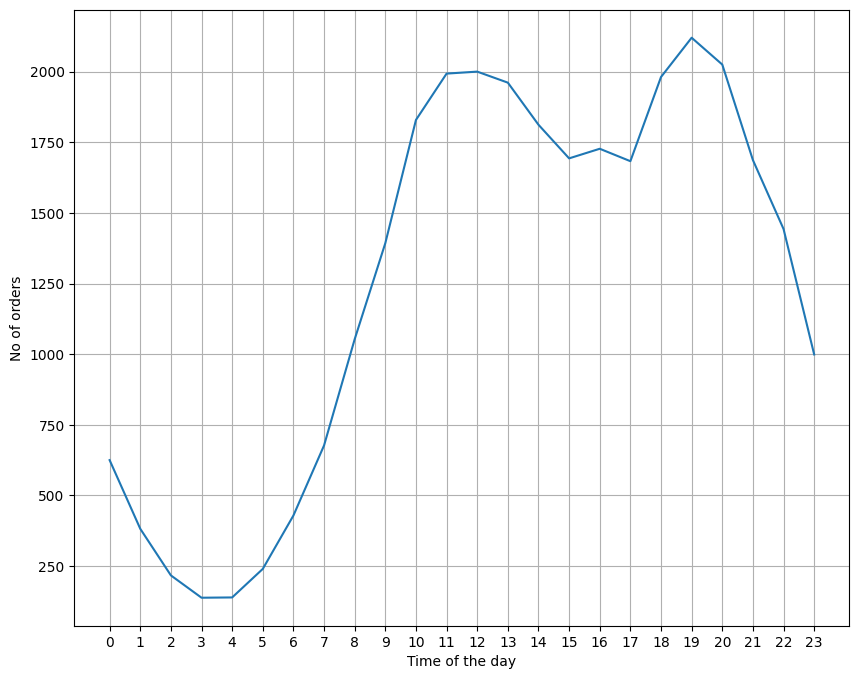

In [109]:
import matplotlib.pyplot as plt

# Grouping by 'Hour' and aggregating the count of orders
best_hour = df.groupby('Hour').size().reset_index(name='Counter')

# Extracting hours
hours = best_hour['Hour']

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(hours, best_hour['Counter'])
plt.xticks(hours)
plt.xlabel('Time of the day')
plt.ylabel('No of orders')
plt.grid()
plt.show()


The best timings for advertisements are between 10 am to 1 pm (when people usually have their lunch and are scrolling their mobile devices) and 6 pm to 8 pm (when people are off work, having dinners or hanging out and using their mobile devices).

### Best day of the week in terms of sales

In [110]:
# Drop rows where 'Week Day' is NaN
df = df.dropna(subset=['Week Day'])

# Group by 'Week Day' and sum only numeric columns
best_weekday = df.groupby('Week Day').sum(numeric_only=True)

print(best_weekday)


           Quantity Ordered  Price Each  Month    Day      Sales   Hour
Week Day                                                               
Friday                 4781   776423.85   4285  66281  780438.24  62200
Monday                 5039   809637.63   4449  67586  816028.97  63978
Saturday               4946   803799.16   4415  74354  810150.12  63546
Sunday                 4497   723972.87   3974  65255  729202.43  57494
Thursday               4969   841108.78   4436  65865  846715.52  63647
Tuesday                5160   859100.87   4589  74334  863966.39  65385
Wednesday              4618   789312.56   4098  61606  793969.75  58310


In [111]:
#arranging days in weekday order
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

best_weekday = best_weekday.reindex(days) 
best_weekday

,Quantity Ordered,Price Each,Month,Day,Sales,Hour
Week Day,,,,,,
Monday,5039,809637.63,4449,67586,816028.97,63978
Tuesday,5160,859100.87,4589,74334,863966.39,65385
Wednesday,4618,789312.56,4098,61606,793969.75,58310
Thursday,4969,841108.78,4436,65865,846715.52,63647
Friday,4781,776423.85,4285,66281,780438.24,62200
Saturday,4946,803799.16,4415,74354,810150.12,63546
Sunday,4497,723972.87,3974,65255,729202.43,57494


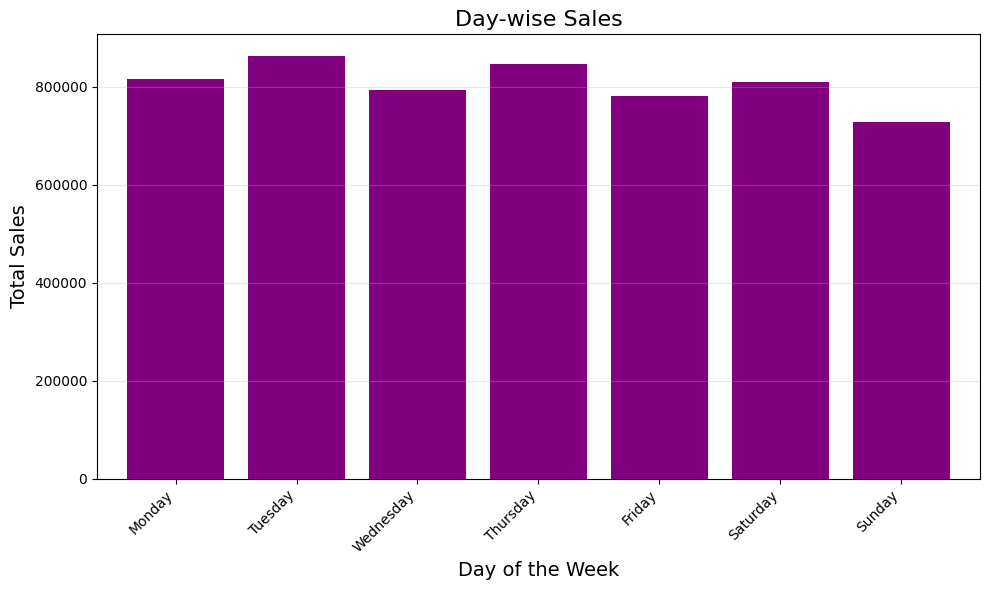

In [112]:
# Ensure 'Sales' column exists
if 'Sales' not in df.columns:
    df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Ensure 'Order Date' is the index
if df.index.name != 'Order Date':
    df = df.set_index('Order Date')

# Extract day of the week (Monday, Tuesday, etc.)
df['Day of Week'] = df.index.day_name()

# Group by day of the week and sum the sales
df_daywise = df.groupby('Day of Week')['Sales'].sum()

# Reorder the days of the week in proper order (Monday, Tuesday, etc.)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_daywise = df_daywise[ordered_days]

# Plot the day-wise sales using a bar chart with purple color
plt.figure(figsize=(10, 6))
df_daywise.plot(kind='bar', color='purple', width=0.8)
plt.title('Day-wise Sales', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Maximum sales happens on Tuesdays. Let's correlate this with the pattern of orders placed during the week.

Since the dataframe displays 'Week Day' in alphabetical order, let us sort and display it in proper weekday order.

Most orders are placed by people on Tuesday (which is strange). One of the reason can be the weekend! Yes, the weekend is certainly the quietest time for orders, as people have more leisure time. So when they are back, they attend to their professional needs and place orders. 

### Hot dates to sell every month

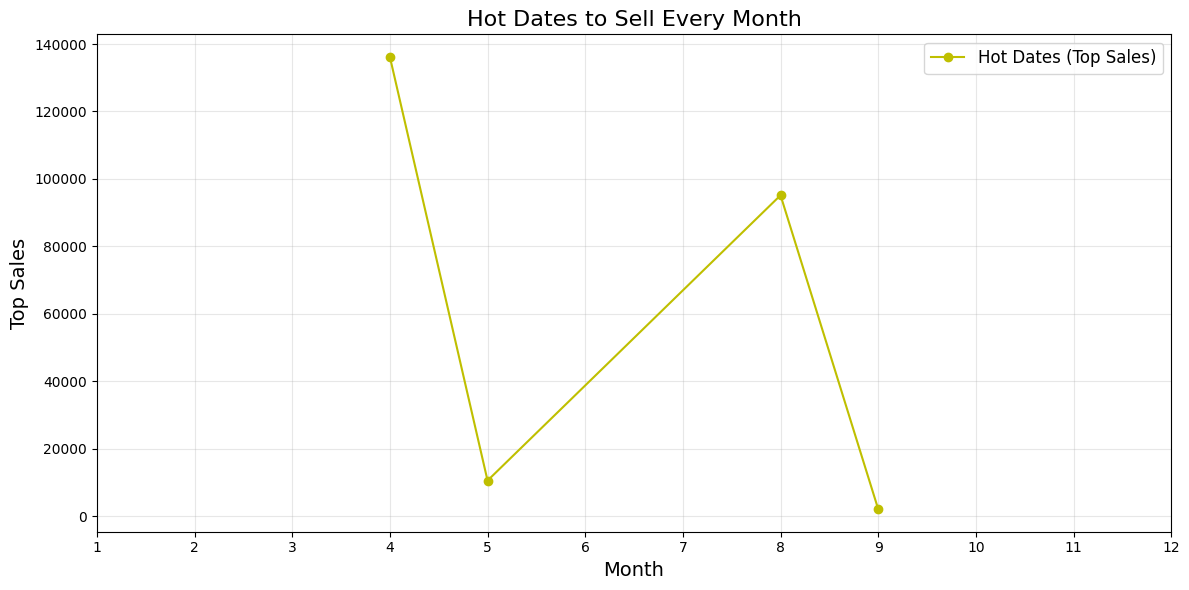

In [113]:
# Ensure 'Sales' column exists
if 'Sales' not in df.columns:
    df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Ensure 'Order Date' is the index
if df.index.name != 'Order Date':
    df = df.set_index('Order Date')

# Group by month and find the top-selling day in each month
df['Month'] = df.index.month
df['Day'] = df.index.day

# Get the daily sales
df_daily_sales = df.groupby(['Month', 'Day'])['Sales'].sum()

# Find the top-selling day for each month
top_days = df_daily_sales.groupby('Month').idxmax()

# Create a DataFrame to store top days' sales
top_sales = df_daily_sales[top_days].reset_index(name='Top Sales')

# Plot the "hot dates" (top days in each month)
plt.figure(figsize=(12, 6))
plt.plot(top_sales['Month'], top_sales['Top Sales'], marker='o', linestyle='-', color='y', label='Hot Dates (Top Sales)')
plt.title('Hot Dates to Sell Every Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Top Sales', fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(range(1, 13))  # Label months from 1 to 12
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


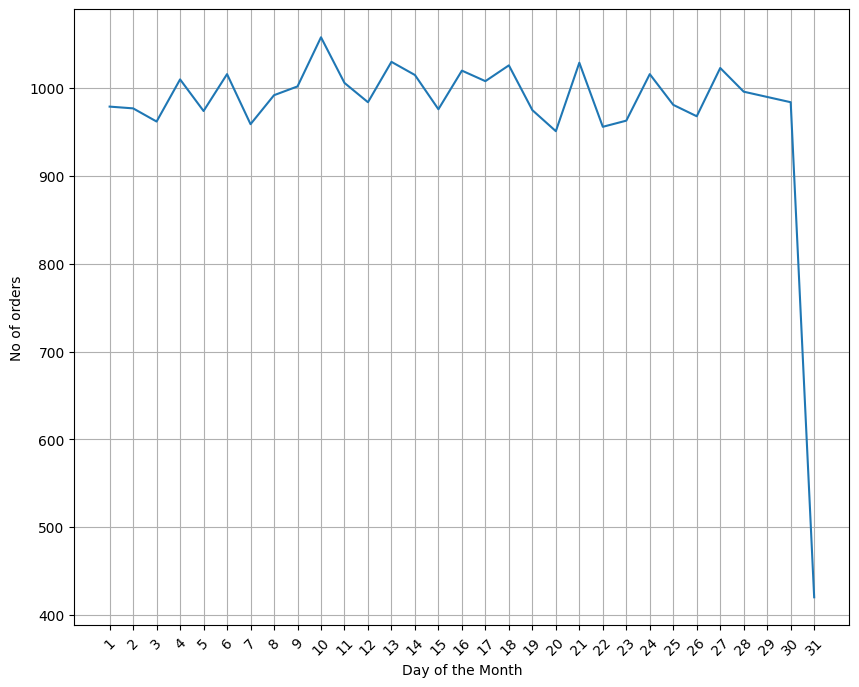

In [114]:
import matplotlib.pyplot as plt

# Grouping by 'Day' and counting orders
hot_dates_sales = df.groupby('Day').size().reset_index(name='Counter')

# Extracting dates
dates = hot_dates_sales['Day']

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(dates, hot_dates_sales['Counter'])
plt.xticks(dates, rotation=45)  # Rotate for better readability if needed
plt.xlabel('Day of the Month')
plt.ylabel('No of orders')
plt.grid()
plt.show()


We have peaks on the 2nd, 10th and 13th of a particular month. These can be hot dates to promote products and get orders. Also, end of the month sees a sharp decine in the number of orders (maybe people are waiting for their salaries).

### Most Ordered Product

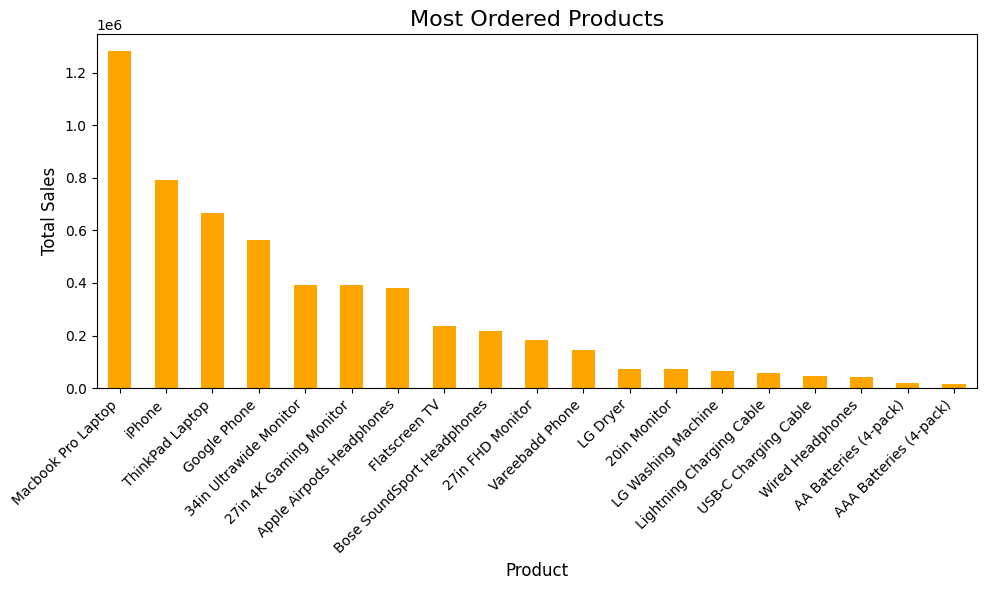

In [115]:
import matplotlib.pyplot as plt

# Group by 'Product' and sum the 'Sales'
product_sales = df.groupby('Product')['Sales'].sum()

# Sort the products by the total sales in descending order
product_sales = product_sales.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='orange')

# Add titles and labels
plt.title('Most Ordered Products', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()


In [116]:
# Convert the 'Price Each' column to numeric, coercing errors to NaN
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Now group by 'Product' and calculate the mean price for each product
prices = df.groupby('Product')['Price Each'].mean()
print(prices)


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


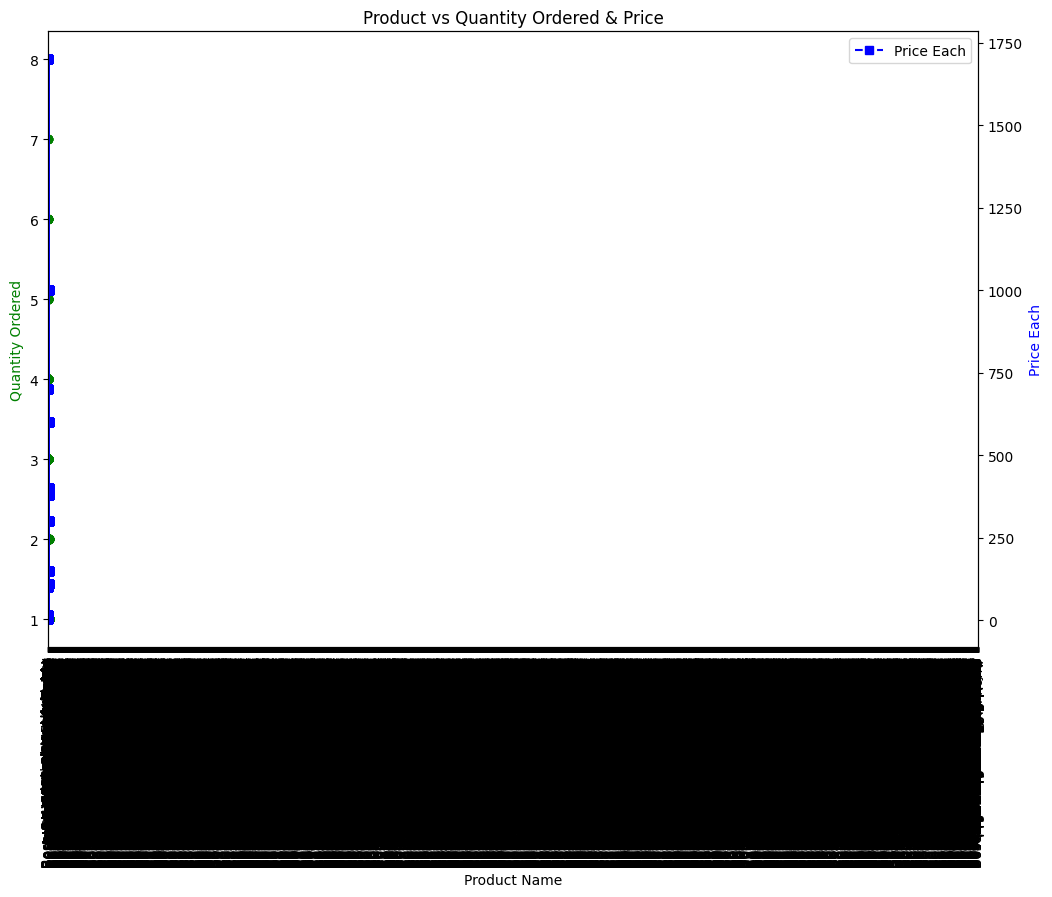

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure column names have no extra spaces
df.columns = df.columns.str.strip()

# Convert numeric columns to proper format
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Assign values correctly
product = df['Product']
most_orders = df['Quantity Ordered']
prices = df['Price Each']

# Drop NaN values if any
df = df.dropna(subset=['Product', 'Quantity Ordered', 'Price Each'])

# Creating the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

ax2 = ax1.twinx()
ax1.plot(product, most_orders, color='g', marker='o', linestyle='dashed', label="Quantity Ordered")
ax2.plot(product, prices, color='b', marker='s', linestyle='dashed', label="Price Each")

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g', size=10)
ax2.set_ylabel('Price Each', color='b', size=10)

ax1.set_xticks(range(len(product)))
ax1.set_xticklabels(product, rotation='vertical', size=10)

plt.title("Product vs Quantity Ordered & Price")
plt.legend()
plt.show()


### Product Combinations Frequently Bought Together

In [118]:
#creating a separate dataframe for order Ids with multiple orders
prod_combos = df[df['Order ID'].duplicated(keep=False)]
prod_combos

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Day,Sales,City,Hour,Week Day,Day of Week
Order Date,,,,,,,,,,,,
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00,Los Angeles (CA),14,Friday,Friday
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99,Los Angeles (CA),14,Friday,Friday
2019-04-03 19:42:00,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",4,3,600.00,Los Angeles (CA),19,Wednesday,Wednesday
2019-04-03 19:42:00,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",4,3,11.95,Los Angeles (CA),19,Wednesday,Wednesday
2019-04-07 11:31:00,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",4,7,99.99,Boston (MA),11,Sunday,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-13 19:26:00,248088,Bose SoundSport Headphones,1,99.99,"614 11th St, San Francisco, CA 94016",8,13,99.99,San Francisco (CA),19,Tuesday,Tuesday
2019-08-28 19:27:00,248105,Google Phone,1,600.00,"21 Center St, New York City, NY 10001",8,28,600.00,New York City (NY),19,Wednesday,Wednesday
2019-08-28 19:27:00,248105,Wired Headphones,1,11.99,"21 Center St, New York City, NY 10001",8,28,11.99,New York City (NY),19,Wednesday,Wednesday


In [119]:
#grouping entries by order IDs
prod_combos['Combined'] = prod_combos.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

#dropping duplicates
prod_combos = prod_combos[['Order ID', 'Combined']].drop_duplicates()

prod_combos

,Order ID,Combined
Order Date,,
2019-04-12 14:38:00,176560,"Google Phone, Wired Headphones"
2019-04-03 19:42:00,176574,"Google Phone, USB-C Charging Cable"
2019-04-07 11:31:00,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
2019-04-10 17:00:00,176586,"AAA Batteries (4-pack), Google Phone"
2019-04-12 11:07:00,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
2019-08-05 09:03:00,248053,"AA Batteries (4-pack), 20in Monitor"
2019-08-13 11:42:00,248068,"Bose SoundSport Headphones, AA Batteries (4-pack)"
2019-08-13 19:26:00,248088,"ThinkPad Laptop, Bose SoundSport Headphones"


In [120]:
#counting unique pairs of products

count = Counter()

for row in prod_combos['Combined']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 172),
 (('Google Phone', 'USB-C Charging Cable'), 167),
 (('iPhone', 'Wired Headphones'), 65),
 (('Google Phone', 'Wired Headphones'), 64),
 (('iPhone', 'Apple Airpods Headphones'), 63),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 58),
 (('Google Phone', 'Bose SoundSport Headphones'), 36),
 (('USB-C Charging Cable', 'Wired Headphones'), 23),
 (('Vareebadd Phone', 'Wired Headphones'), 22),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 17)]

In [121]:
#counting unique triplets of products

count1 = Counter()

for row in prod_combos['Combined']:
    row_list1 = row.split(', ')
    count1.update(Counter(combinations(row_list1,3)))

count1.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 15),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 9),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 6),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 5),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 4),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  3),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 3),
 (('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'), 1),
 (('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable'), 1),
 (('Google Phone', 'Wired Headphones', 'USB-C Charging Cable'), 1)]

This gives you insights into what products can be sold together at a certain discount or if a user is viewing a product/has purchased a product, which other products can be shown in recommendations. You can also target people based on this for your advertisements.

# THE END


## Adding ARIMA and SARIMA for Time Series Forecasting

This section introduces ARIMA (Auto-Regressive Integrated Moving Average) and SARIMA (Seasonal ARIMA) models for forecasting.
We will:
1. Check the stationarity of the time series.
2. Visualize ACF and PACF plots to determine model parameters.
3. Fit ARIMA and optionally SARIMA models to the data.
4. Evaluate model performance and forecast future values.


In [122]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import sqrt
import matplotlib.pyplot as plt

In [123]:
print(df.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Purchase Address', 'Month', 'Day', 'Sales', 'City', 'Hour', 'Week Day',
       'Day of Week'],
      dtype='object')


In [124]:
# Display unique values in 'Month' and 'Day'
print("Unique values in Month:", df['Month'].unique())
print("Unique values in Day:", df['Day'].unique())


Unique values in Month: [4 5 8 9]
Unique values in Day: [19  7 12 30 29  2 24  8 18 15 16 22  4 27  3 28  9 11  5 20 10 21 17  1
 26 25 13 14 23  6 31]


In [125]:
# Convert 'Month' and 'Day' to numeric, coercing errors to NaN
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Day'] = pd.to_numeric(df['Day'], errors='coerce')

In [126]:
# Drop rows where 'Month' or 'Day' are invalid
df = df.dropna(subset=['Month', 'Day'])

# Ensure 'Month' is within valid range (1-12)
df = df[(df['Month'] >= 1) & (df['Month'] <= 12)]

# Ensure 'Day' is within valid range (1-31)
df = df[(df['Day'] >= 1) & (df['Day'] <= 31)]


In [127]:
# Create 'Order Date' column using valid 'Month' and 'Day'
df['Order Date'] = pd.to_datetime({
    'year': 2024,  # Replace with the correct year if necessary
    'month': df['Month'].astype(int),
    'day': df['Day'].astype(int)
})


In [128]:
# Set 'Order Date' as the index
df = df.set_index('Order Date')


In [129]:

# Example: DataFrame structure
# df = pd.read_csv('your_file.csv')  # Load your dataset

# Clean 'Month' and 'Day' columns
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Day'] = pd.to_numeric(df['Day'], errors='coerce')

# Drop rows with invalid or missing data
df = df.dropna(subset=['Month', 'Day'])

# Filter for valid month and day ranges
df = df[(df['Month'] >= 1) & (df['Month'] <= 12)]
df = df[(df['Day'] >= 1) & (df['Day'] <= 31)]

# Create 'Order Date' column
df['Order Date'] = pd.to_datetime({
    'year': 2024,  # Adjust the year as necessary
    'month': df['Month'].astype(int),
    'day': df['Day'].astype(int)
})

# Set 'Order Date' as index
df = df.set_index('Order Date')

# Confirm the changes
print(df.head())


           Order ID                     Product  Quantity Ordered  Price Each  \
Order Date                                                                      
2024-04-19   176558        USB-C Charging Cable                 2       11.95   
2024-04-07   176559  Bose SoundSport Headphones                 1       99.99   
2024-04-12   176560                Google Phone                 1      600.00   
2024-04-12   176560            Wired Headphones                 1       11.99   
2024-04-30   176561            Wired Headphones                 1       11.99   

                                Purchase Address  Month  Day   Sales  \
Order Date                                                             
2024-04-19          917 1st St, Dallas, TX 75001      4   19   23.90   
2024-04-07     682 Chestnut St, Boston, MA 02215      4    7   99.99   
2024-04-12  669 Spruce St, Los Angeles, CA 90001      4   12  600.00   
2024-04-12  669 Spruce St, Los Angeles, CA 90001      4   12   11.99   


In [130]:
# Aggregate sales data by date if not already aggregated
df_daily = df['Sales'].resample('D').sum()

# Inspect the time series
print(df_daily.head())

# Check for missing dates and fill if necessary
df_daily = df_daily.asfreq('D').fillna(0)

Order Date
2024-04-01    107527.34
2024-04-02    104496.71
2024-04-03    113611.75
2024-04-04    116214.99
2024-04-05    114012.88
Freq: D, Name: Sales, dtype: float64


In [131]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_daily)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("Data is non-stationary. Differencing might be required.")
else:
    print("Data is stationary.")

ADF Statistic: -2.0715330270289365
p-value: 0.25611427002135867
Data is non-stationary. Differencing might be required.


In [132]:
# Differencing to make the series stationary
df_stationary = df_daily.diff().dropna()

In [133]:
# Split data
train_size = int(len(df_daily) * 0.8)
train, test = df_daily[:train_size], df_daily[train_size:]

In [134]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model (example p=1, d=1, q=1)
arima_model = ARIMA(train, order=(1, 1, 1))

# Fit the model
arima_fitted = arima_model.fit()

# Print summary
print(arima_fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  123
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1329.357
Date:                Mon, 03 Mar 2025   AIC                           2664.713
Time:                        22:05:25   BIC                           2673.125
Sample:                    04-01-2024   HQIC                          2668.130
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8899      0.057    -15.688      0.000      -1.001      -0.779
ma.L1          0.9980      0.066     15.014      0.000       0.868       1.128
sigma2      1.748e+08    4.6e-10    3.8e+17      0.0

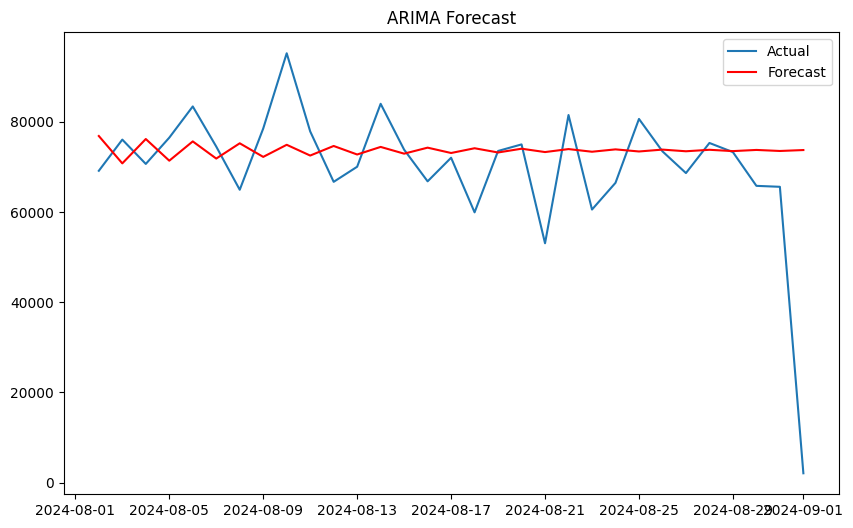

In [135]:
# Forecast on test set
forecast = arima_fitted.forecast(steps=len(test))

# Plot actual vs forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()


In [136]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model (example p=1, d=1, q=1, seasonal (1,1,1,7))
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))

# Fit the model
sarima_fitted = sarima_model.fit()

# Print summary
print(sarima_fitted.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04046D+01    |proj g|=  7.01731D-02

At iterate    5    f=  1.03744D+01    |proj g|=  1.42638D-02

At iterate   10    f=  1.03729D+01    |proj g|=  1.66381D-03

At iterate   15    f=  1.03728D+01    |proj g|=  1.82956D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   1.830D-05   1.037D+01
  F =   10.372782796855940     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

 This problem is unconstrained.


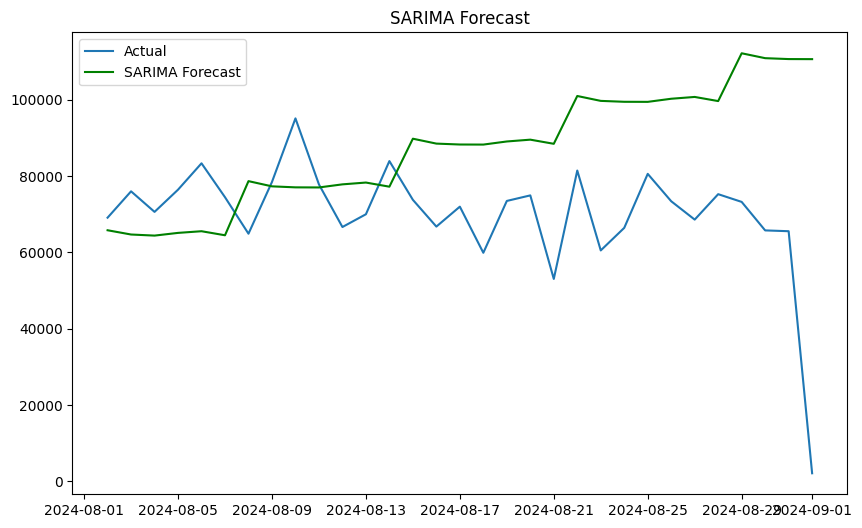

In [137]:
# Forecast on test set
sarima_forecast = sarima_fitted.forecast(steps=len(test))

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.legend()
plt.title("SARIMA Forecast")
plt.show()


In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE for ARIMA
mae_arima = mean_absolute_error(test, forecast)
rmse_arima = np.sqrt(mean_squared_error(test, forecast))

# Calculate MAE and RMSE for SARIMA
mae_sarima = mean_absolute_error(test, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test, sarima_forecast))

print("ARIMA MAE:", mae_arima, "RMSE:", rmse_arima)
print("SARIMA MAE:", mae_sarima, "RMSE:", rmse_sarima)


ARIMA MAE: 8741.125865546379 RMSE: 15278.54353373948
SARIMA MAE: 22585.3678998584 RMSE: 30111.54772371819
